In [2]:
from keras import Sequential
from keras.layers import Dense,Flatten
import pandas as pd

/Users/owner/Desktop/FastAPI/myvenv/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [7]:
df=pd.read_csv("insurance.csv")

In [8]:
df

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92000,False,Jaipur,retired,High
1,36,101.1,1.83,34.28000,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64000,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34000,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94000,True,Indore,retired,High
...,...,...,...,...,...,...,...,...
95,36,52.8,1.57,19.64000,False,Indore,business_owner,Low
96,26,113.8,1.54,34.01000,False,Delhi,private_job,Low
97,52,60.8,1.80,44.86000,False,Hyderabad,freelancer,Low
98,27,101.1,1.82,28.30000,False,Kolkata,business_owner,Low


In [9]:
df.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Jaipur,retired,High
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94,True,Indore,retired,High


In [10]:
new_df = df.drop(columns=["occupation"])
new_df = pd.get_dummies(new_df, columns=['smoker', "city"], drop_first=True)
new_df.rename(columns={"smoker_True": "smoker"}, inplace=True)
category_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
new_df["insurance_premium_category"] = new_df["insurance_premium_category"].map(category_mapping)
y = new_df["insurance_premium_category"]
x = new_df.drop(columns=['insurance_premium_category'])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [13]:
import tensorflow
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense





In [171]:
model=Sequential()
model.add(Dense(5,input_dim=len(x.columns),activation="relu"))
model.add(Dense(11,activation='relu'))
model.add(Dense(3, activation='softmax'))


/Users/owner/Desktop/FastAPI/myvenv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [172]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 5)              │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202 (808.00 B)

 Trainable params: 202 (808.00 B)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [176]:
info = model.fit(x_train,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5938 - loss: 0.9366 - val_accuracy: 0.5625 - val_loss: 0.9327
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5938 - loss: 0.9339 - val_accuracy: 0.5625 - val_loss: 0.9304
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5938 - loss: 0.9314 - val_accuracy: 0.5625 - val_loss: 0.9284
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5938 - loss: 0.9290 - val_accuracy: 0.5625 - val_loss: 0.9264
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5938 - loss: 0.9266 - val_accuracy: 0.5625 - val_loss: 0.9246
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6094 - loss: 0.9242 - val_accuracy: 0.5625 - val_loss: 0.9228
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6094 - loss: 0.9218 - val_accuracy: 0.5625 - val_loss: 0.9208
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6094 - loss: 0.9194 - val_accuracy: 0.5000 - val_loss:

In [181]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)
accuracy_score(y_test, y_pred_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


0.6

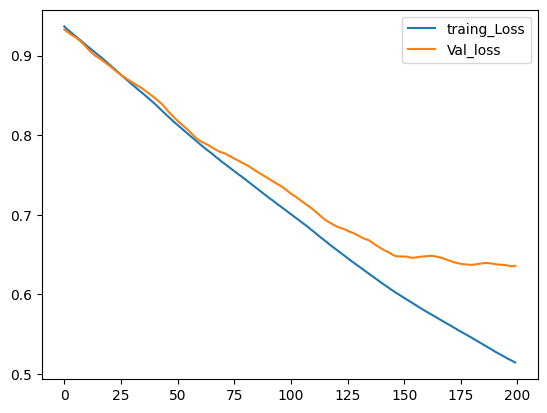

In [184]:
import matplotlib.pyplot as plt

plt.plot(info.history['loss'],label='traing_Loss')
plt.plot(info.history['val_loss'],label='Val_loss')
plt.legend()

In [185]:
model.save('my_model.h5')

In [4]:
import tensorflow as tf

model = tf.keras.models.load_model("my_model.h5")

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 5)              │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204 (820.00 B)

 Trainable params: 202 (808.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [21]:
x_test[0].reshape(1,-1).shape

(1, 19)

In [50]:
b = []
c = {"0": "low", "1": "moderate", "2": "high"}
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
for pred in predicted_classes:
    b.append(c[str(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [45]:

result=model.predict(x_test[0].reshape(1,-1))
a=result.argmax()
c={"0":"low","1":"moderate","":"high"}
b=c[str(a)]
print(b)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
moderate


In [69]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score

In [53]:
df=pd.read_csv("insurance.csv")

In [54]:
df

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92000,False,Jaipur,retired,High
1,36,101.1,1.83,34.28000,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64000,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34000,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94000,True,Indore,retired,High
...,...,...,...,...,...,...,...,...
95,36,52.8,1.57,19.64000,False,Indore,business_owner,Low
96,26,113.8,1.54,34.01000,False,Delhi,private_job,Low
97,52,60.8,1.80,44.86000,False,Hyderabad,freelancer,Low
98,27,101.1,1.82,28.30000,False,Kolkata,business_owner,Low


In [55]:
df['occupation'].unique()

array(['retired', 'freelancer', 'student', 'government_job',
       'business_owner', 'unemployed', 'private_job'], dtype=object)

In [56]:
df_feat = df.copy()

In [58]:
df_feat["bmi"] = df_feat["weight"] / (df_feat["height"] ** 2)

In [59]:
# Feature 2: Age Group
def age_group(age):
    if age < 25:
        return "young"
    elif age < 45:
        return "adult"
    elif age < 60:
        return "middle_aged"
    return "senior"

In [60]:

df_feat["age_group"] = df_feat["age"].apply(age_group)

In [61]:
	

# Feature 3: Lifestyle Risk
def lifestyle_risk(row):
    if row["smoker"] and row["bmi"] > 30:
        return "high"
    elif row["smoker"] or row["bmi"] > 27:
        return "medium"
    else:
        return "low"

In [62]:

df_feat["lifestyle_risk"] = df_feat.apply(lifestyle_risk, axis=1)

In [63]:
tier_1_cities = ["Mumbai", "Delhi", "Bangalore", "Chennai", "Kolkata", "Hyderabad", "Pune"]
tier_2_cities = [
    "Jaipur", "Chandigarh", "Indore", "Lucknow", "Patna", "Ranchi", "Visakhapatnam", "Coimbatore",
    "Bhopal", "Nagpur", "Vadodara", "Surat", "Rajkot", "Jodhpur", "Raipur", "Amritsar", "Varanasi",
    "Agra", "Dehradun", "Mysore", "Jabalpur", "Guwahati", "Thiruvananthapuram", "Ludhiana", "Nashik",
    "Allahabad", "Udaipur", "Aurangabad", "Hubli", "Belgaum", "Salem", "Vijayawada", "Tiruchirappalli",
    "Bhavnagar", "Gwalior", "Dhanbad", "Bareilly", "Aligarh", "Gaya", "Kozhikode", "Warangal",
    "Kolhapur", "Bilaspur", "Jalandhar", "Noida", "Guntur", "Asansol", "Siliguri"
]
   

In [64]:
# Feature 4: City Tier
def city_tier(city):
    if city in tier_1_cities:
        return 1
    elif city in tier_2_cities:
        return 2
    else:
        return 3

In [65]:
df_feat["city_tier"] = df_feat["city"].apply(city_tier)

In [66]:
df_feat.drop(columns=['age', 'weight', 'height', 'smoker', 'city'])[['income_lpa', 'occupation', 'bmi', 'age_group', 'lifestyle_risk', 'city_tier', 'insurance_premium_category']].sample(5)


,income_lpa,occupation,bmi,age_group,lifestyle_risk,city_tier,insurance_premium_category
43,1.56,retired,29.308163,senior,medium,1,Medium
28,11.63,unemployed,31.584532,adult,medium,1,Low
26,23.61,freelancer,30.477219,adult,medium,2,Medium
90,21.07,business_owner,21.093750,middle_aged,low,1,Low
54,3.32,retired,21.025423,senior,medium,2,High


In [67]:

# Select features and target
X = df_feat[["bmi", "age_group", "lifestyle_risk", "city_tier", "income_lpa", "occupation"]]
y = df_feat["insurance_premium_category"]

In [68]:

# Define categorical and numeric features
categorical_features = ["age_group", "lifestyle_risk", "occupation", "city_tier"]
numeric_features = ["bmi", "income_lpa"]

In [70]:

# Create column transformer for OHE
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

In [71]:
# Create a pipeline with preprocessing and random forest classifier
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [73]:
# Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [74]:

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [75]:

X_test.sample(5)

,bmi,age_group,lifestyle_risk,city_tier,income_lpa,occupation
65,37.662982,middle_aged,high,2,38.07,unemployed
10,22.949982,adult,medium,1,32.78,business_owner
81,31.866055,adult,high,2,22.19,freelancer
33,21.791064,senior,low,1,1.46,retired
92,18.319942,adult,medium,2,30.00,government_job


In [76]:
import pickle

# Save the trained pipeline using pickle
pickle_model_path = "model.pkl"
with open(pickle_model_path, "wb") as f:
    pickle.dump(pipeline, f)
